Table of Contents

1. [Importing Packages and Reading in the Data](https://colab.research.google.com/drive/1Z2i1e2BXSovUkfoXZyjcRl-mEgYRS-NI#scrollTo=Q490onU_xWnf&line=2&uniqifier=1)

2. [Data Information](https://colab.research.google.com/drive/1Z2i1e2BXSovUkfoXZyjcRl-mEgYRS-NI#scrollTo=gqOyfk0rxlqW&line=1&uniqifier=1)

3. [Data Analytics](https://colab.research.google.com/drive/1Z2i1e2BXSovUkfoXZyjcRl-mEgYRS-NI#scrollTo=vOBKBQ67u8pt&line=1&uniqifier=1)


# Importing Packages and Reading in the Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

path = '/content/gdrive/MyDrive/data/'
csv = 'diamonds.csv'

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msngo
import plotly.offline as pyo
import plotly.graph_objects as go
import seaborn as sns

Reading in the data

In [3]:
df = pd.read_csv(path+csv)

View of the data frame. There appears to be elements in the variables 'color' and 'clarity' that have the letter 'b' that needs to be removed. 

In [4]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


As we can see there is no data missing. 

<Axes: >

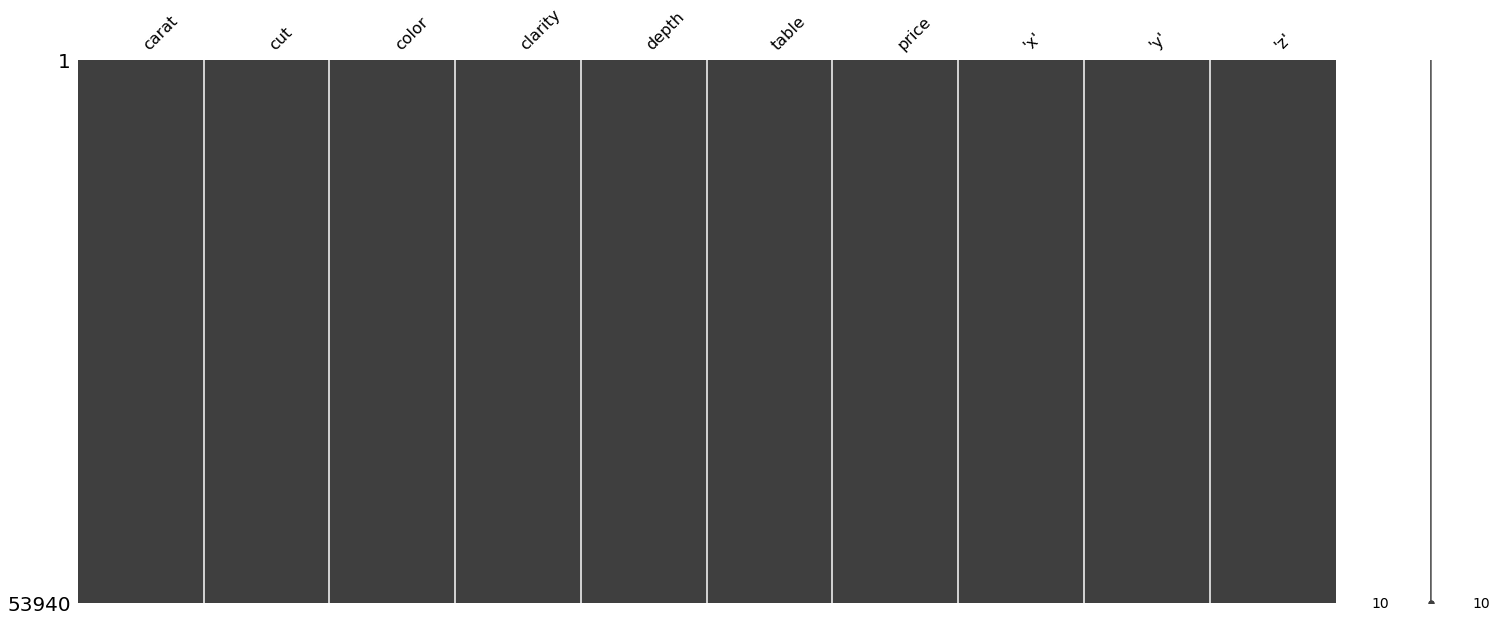

In [6]:
msngo.matrix(df)

# Cleaning the Data


Will be cleaning the data frame by removing the 'b' from the as before mentioned variables 'color' and 'clarity'. 

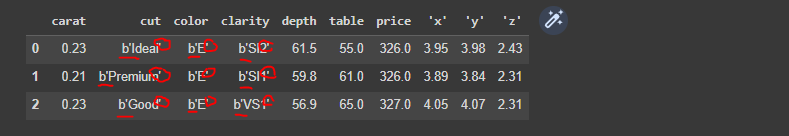

In [7]:
df['cut'] = [i.rstrip("'") for i in df['cut']]
df['cut'] = [i.strip("b'") for i in df['cut']]

df['color'] = [i.rstrip("'") for i in df['color']]
df['color'] = [i.strip("b'") for i in df['color']]

df['clarity'] = [i.rstrip("'") for i in df['clarity']]
df['clarity'] = [i.strip("b'") for i in df['clarity']]



Now, the variables that have been cleaned and the "b''" has been removed. 

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


Now, we will see if there are any duplicates in the data frame. 



In [9]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,'x','y','z'
1005,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105.0,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919.0,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093.0,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130.0,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203.0,5.19,5.17,3.17


Now that we know there are duplicates we will remove them

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,'x','y','z'


# Data Analysis

<Axes: xlabel='price', ylabel='Count'>

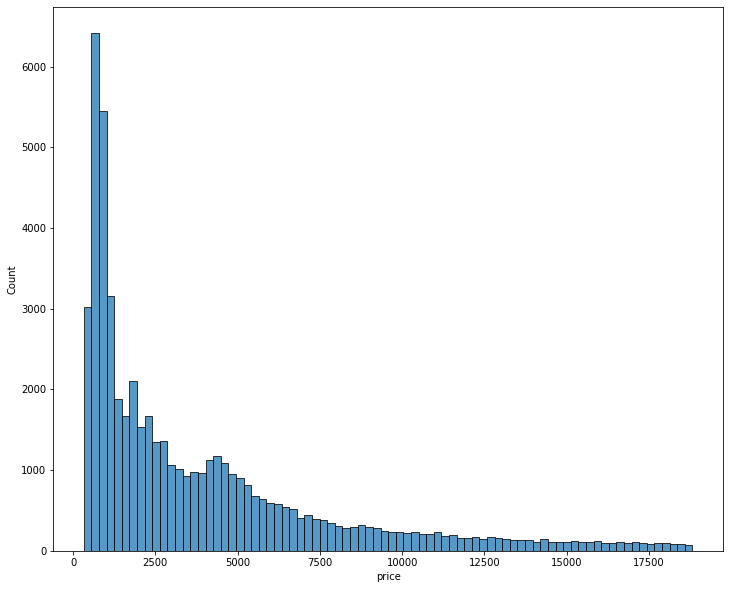

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.histplot(df, x='price')

As shown above by the right skewed data there is a disproportionate number of diamonds that are valued below $2,500. Therefore, we can answer the question what price range are the majority of the diamonds in this data set.

<Axes: xlabel='color', ylabel='price'>

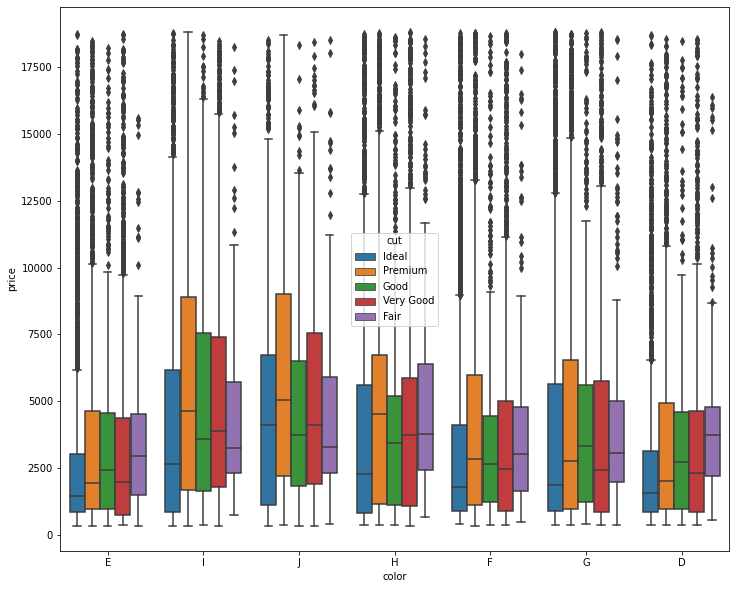

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df, x='color', y='price', hue='cut')

From the given data the box plots show that:

*   Premium J color diamonds have the highest median value.

*   Ideal E color diamonds have the lowest median value.

This result goes against GIA information. According to GIA D and E diamonds are the most rare therefore likely most expensive. This is not shown in the median prices of the box plots. There is however another possibility, the data may reflect an unproportial small carat size for the E and D diamonds. Meanwhile there may be more large carat size J diamonds in the data set.





<Axes: xlabel='carat', ylabel='Count'>

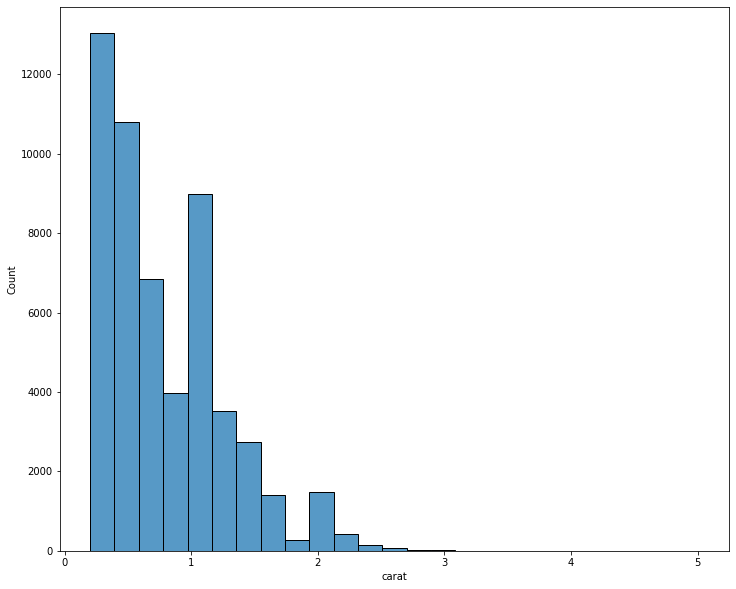

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.histplot(df, x='carat', bins = 25)

The data is right skewed showing that there is a large number of diamonds in the data set that are 1 carat or below in size.


<Axes: title={'center': 'Median Carat of Diamonds by Color'}, xlabel='color'>

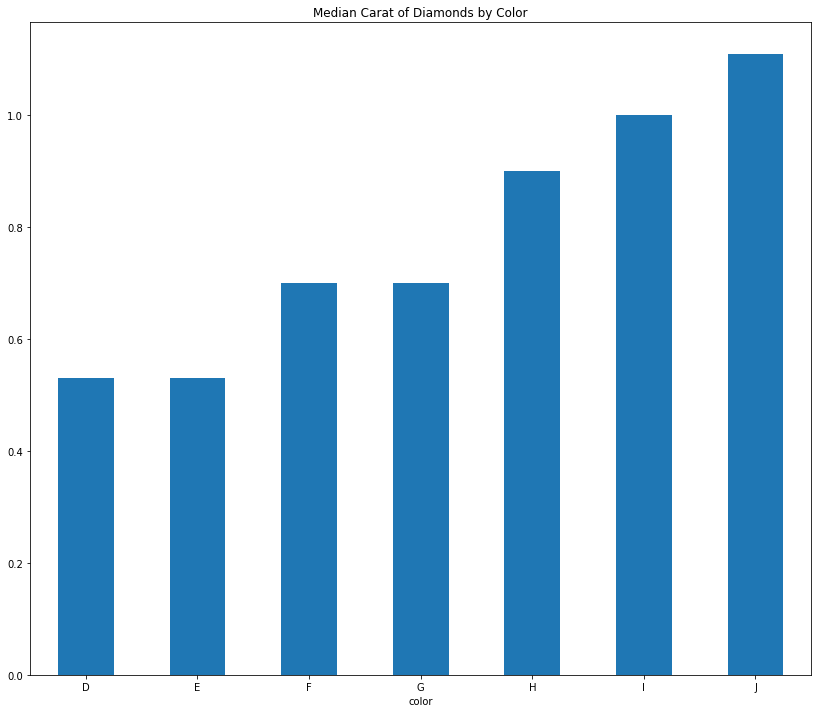

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 12)
df.groupby('color')['carat'].median().plot(kind='bar', rot = 0, title= 'Median Carat of Diamonds by Color')

In [35]:
df.groupby('color')['carat'].agg([min, max, np.median, np.mean])

,min,max,median,mean
color,,,,
D,0.20,3.40,0.53,0.658315
E,0.20,3.05,0.53,0.657957
F,0.20,3.01,0.70,0.736664
G,0.23,3.01,0.70,0.771273
H,0.23,4.13,0.90,0.911029
I,0.23,4.01,1.00,1.025197
J,0.23,5.01,1.11,1.162841


As suspected we see that the median carat size is greater for the I and J diamonds in the data set. While the median carat size for the D and E diamonds is less. 

<Axes: xlabel='color', ylabel='carat'>

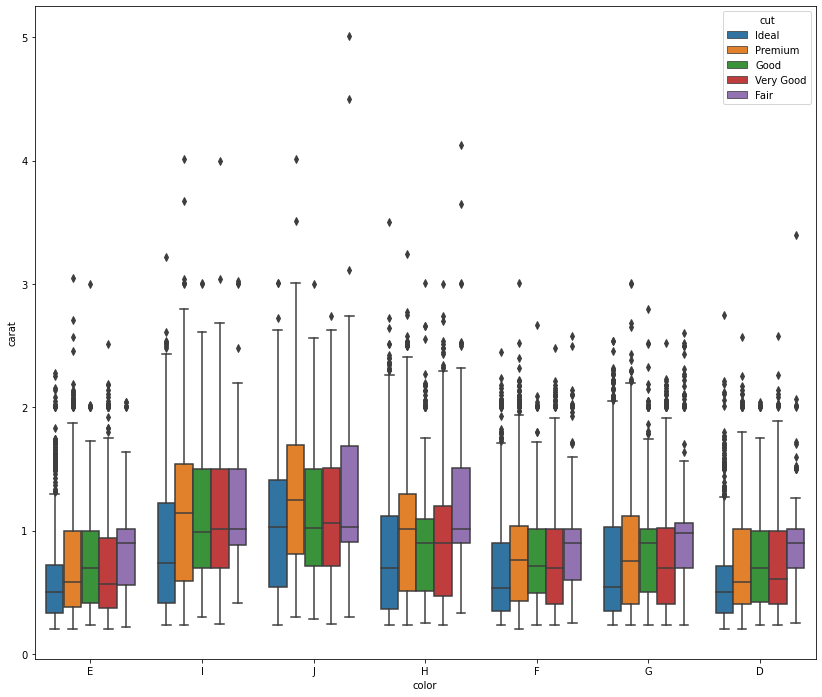

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 12)
sns.boxplot(data=df, x='color', y='carat', hue='cut')

Again, based on the box plots of the data it appears that the median carat size of the I and J diamonds is greater than the median carat size of the E and D diamonds in the data set. 

#  More coming soon

In [65]:

df1 = df.groupby(['color', 'clarity'])['price']


<Axes: xlabel='color', ylabel='price'>

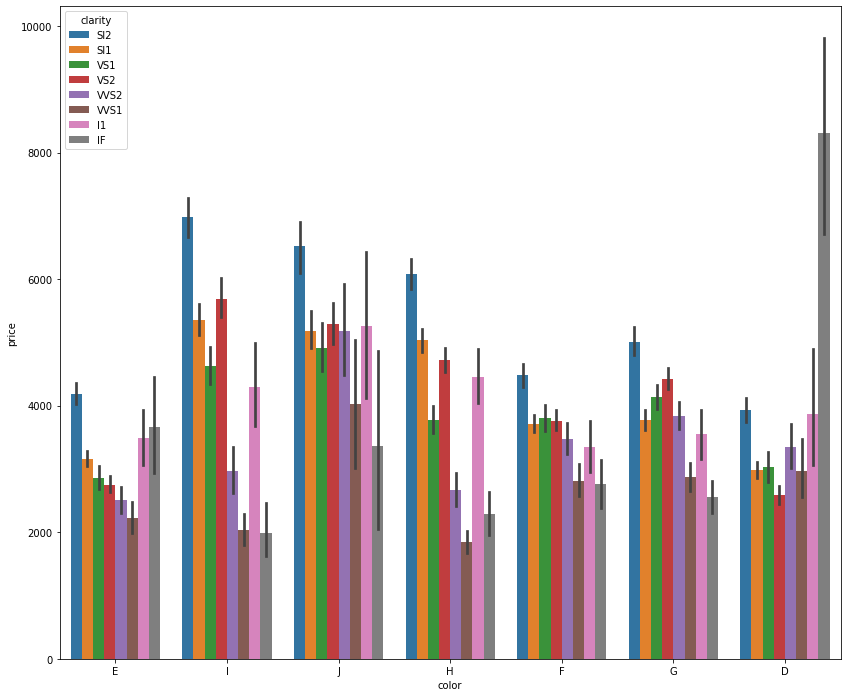

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 12)
sns.barplot(x='color', y='price', hue='clarity', data=df)

In [68]:
df2 = df.groupby(['color', 'clarity'])['carat']

<Axes: xlabel='color', ylabel='carat'>

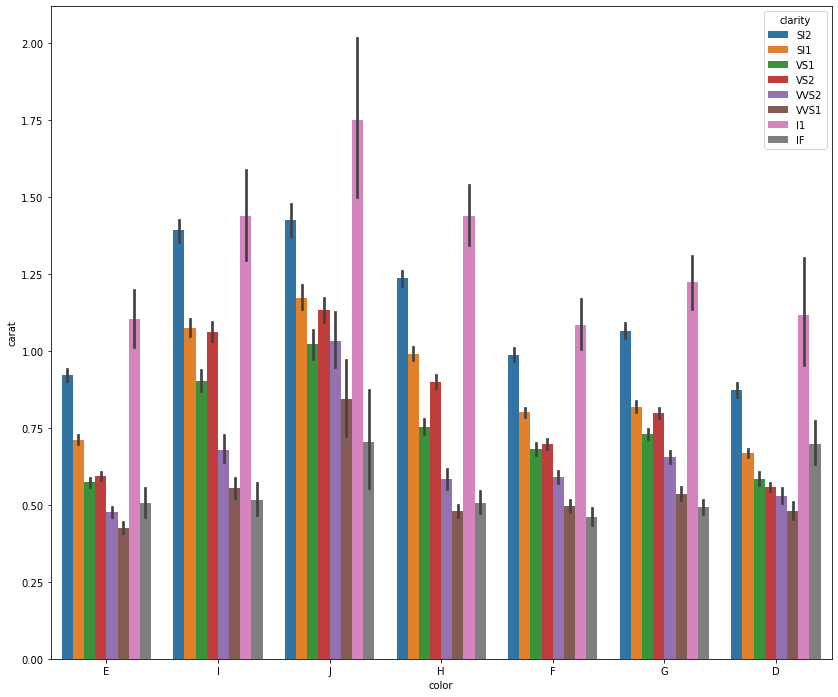

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 12)
sns.barplot(x='color', y='carat', hue='clarity', data=df)